In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from shapely.geometry import Polygon
from shapely.validation import make_valid

from findmycells.utils import get_polygon_from_instance_segmentation

In [2]:
from skimage.io import imread

In [3]:
from skimage.transform import PiecewiseAffineTransform, warp

In [4]:
reference = imread('/mnt/c/Users/dsege/TEMP/findmycells_projects/dummy_data/reference_area.png')
rotated = imread('/mnt/c/Users/dsege/TEMP/findmycells_projects/dummy_data/rotated_area.png')

In [7]:
reference_roi = get_polygon_from_instance_segmentation(reference, 255)
ref_coords_x, ref_coords_y = np.asarray(reference_roi.boundary.xy[0]), np.asarray(reference_roi.boundary.xy[1])
np.where(ref_coords_x == ref_coords_x.min())

(array([217, 218]),)

In [8]:
tip_point_ref_index = 217
tip_point_ref_coords = (reference_roi.boundary.xy[1][tip_point_ref_index], reference_roi.boundary.xy[0][tip_point_ref_index])

In [9]:
comparison_points_reference = []
remaining_indices = (ref_coords_x.shape[0] - 217) // 5
for i in range(remaining_indices):
    comparison_points_reference.append((reference_roi.boundary.xy[1][tip_point_ref_index + i*5], reference_roi.boundary.xy[0][tip_point_ref_index + i*5]))

remainder_indices = (ref_coords_x.shape[0] - 217) % 5
starting_index = 5 - remainder_indices
n_remaining_points_to_add = (217 - starting_index) // 5 + 1
for i in range(n_remaining_points_to_add):
    comparison_points_reference.append((reference_roi.boundary.xy[1][starting_index + i*5], reference_roi.boundary.xy[0][starting_index + i*5]))

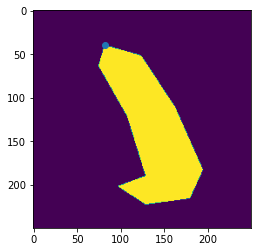

In [10]:
plt.imshow(reference)
for i in range(1):
    plt.scatter(comparison_points_reference[i][0], comparison_points_reference[i][1])

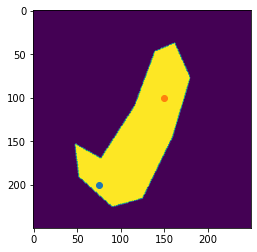

In [30]:
plt.imshow(rotated)
for coords in points_in_rotated:
    plt.scatter(x=coords[0], y=coords[1])
plt.show()

In [52]:
squares_in_rotated = [(60,90, 140,170), (170,200, 85,115)]

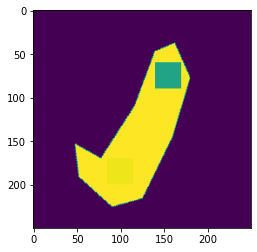

In [53]:
rotated_squares = np.zeros(rotated.shape, dtype='uint8')
rotated_squares[squares_in_rotated[0][0]:squares_in_rotated[0][1], squares_in_rotated[0][2]:squares_in_rotated[0][3]] = 150
rotated_squares[squares_in_rotated[1][0]:squares_in_rotated[1][1], squares_in_rotated[1][2]:squares_in_rotated[1][3]] = 250
plt.imshow(rotated_squares + rotated)

In [54]:
points_in_rotated = [(75, 155), (185, 90)]

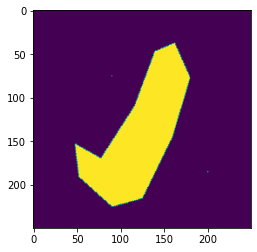

In [55]:
rotated_points = np.zeros(rotated.shape, dtype='uint8')
rotated_points[points_in_rotated[0][0], squares_in_rotated[0][1]] = 150
rotated_points[points_in_rotated[1][0], squares_in_rotated[1][1]] = 250
plt.imshow(rotated_points + rotated)

In [29]:
rotated_roi = get_polygon_from_instance_segmentation(rotated, 255)
rot_coords_x, rot_coords_y = np.asarray(rotated_roi.boundary.xy[0]), np.asarray(rotated_roi.boundary.xy[1])
np.where(rot_coords_x == rot_coords_x.min())

(array([262]),)

In [12]:
tip_point_rot_index = 262
tip_point_rot_coords = (rotated_roi.boundary.xy[1][tip_point_rot_index], rotated_roi.boundary.xy[0][tip_point_rot_index])

In [13]:
comparison_points_rotated = []
remaining_indices = (rot_coords_x.shape[0] - tip_point_rot_index) // 5
for i in range(remaining_indices):
    comparison_points_rotated.append((rotated_roi.boundary.xy[1][tip_point_rot_index + i*5], rotated_roi.boundary.xy[0][tip_point_rot_index + i*5]))

remainder_indices = (rot_coords_x.shape[0] - tip_point_rot_index) % 5
starting_index = 5 - remainder_indices
n_remaining_points_to_add = (tip_point_rot_index - starting_index) // 5 + 1
for i in range(n_remaining_points_to_add):
    comparison_points_rotated.append((rotated_roi.boundary.xy[1][starting_index + i*5], rotated_roi.boundary.xy[0][starting_index + i*5]))

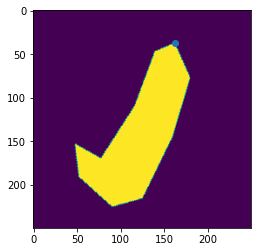

In [14]:
plt.imshow(rotated)
for i in range(1):
    plt.scatter(comparison_points_rotated[i][0], comparison_points_rotated[i][1])

In [15]:
np.asarray(comparison_points_rotated).shape

(95, 2)

In [61]:
tform = PiecewiseAffineTransform()
tform.estimate(np.asarray(comparison_points_rotated), np.asarray(comparison_points_reference))

True

In [24]:
tform.affines

[<AffineTransform(matrix=
     [[ 1.00000000e+00, -9.22991449e-17, -2.84217094e-14],
      [-3.16360485e-01,  1.47240519e+00, -1.19712902e+02],
      [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]) at 0x7fa4c5e17110>,
 <AffineTransform(matrix=
     [[ 1.00000000e+00, -4.90352199e-17,  1.42108547e-14],
      [-2.56024124e-01,  1.50098558e+00, -1.29468339e+02],
      [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]) at 0x7fa4c5e17090>,
 <AffineTransform(matrix=
     [[ 1.00000000e+00,  3.53578360e-16, -1.13686838e-13],
      [ 5.30513039e-01,  1.50981528e+00, -1.95563838e+02],
      [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]) at 0x7fa4c5e171d0>,
 <AffineTransform(matrix=
     [[ 1.00000000e+00,  5.08480492e-17,  0.00000000e+00],
      [ 4.73426560e-01,  1.53685624e+00, -2.00178829e+02],
      [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]) at 0x7fa4c5e17210>,
 <AffineTransform(matrix=
     [[ 1.00000000e+00,  1.14785401e-16, -2.30926389e-14],
      [-1.18901659e

In [17]:
out = warp(rotated, tform, output_shape=rotated.shape)

In [62]:
out_squares = warp(rotated_squares, tform, output_shape=rotated.shape)

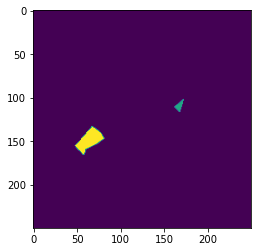

In [63]:
plt.imshow(out_squares)

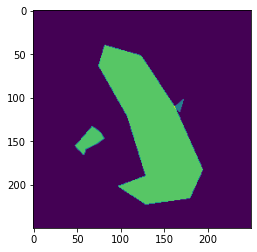

In [64]:
plt.imshow(reference + out_squares)

In [65]:
out_points = warp(rotated_points, tform, output_shape=rotated.shape)

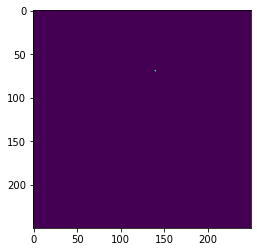

In [66]:
plt.imshow(out_points)

In [67]:
plt.imshow(reference + out)

ValueError: operands could not be broadcast together with shapes (250,250) (437,512,3) 

In [19]:
reference[np.where(reference == 255)] = 1

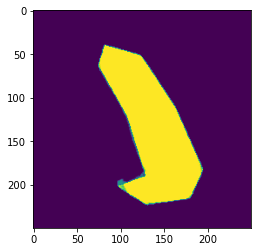

In [20]:
plt.imshow(reference + out)

In [21]:
out.shape

(250, 250)

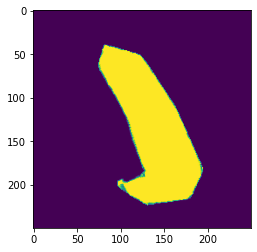

In [22]:
plt.imshow(out)

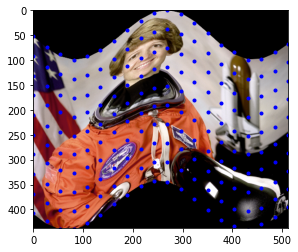

In [23]:
from skimage import data


image = data.astronaut()
rows, cols = image.shape[0], image.shape[1]

src_cols = np.linspace(0, cols, 20)
src_rows = np.linspace(0, rows, 10)
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

# add sinusoidal oscillation to row coordinates
dst_rows = src[:, 1] - np.sin(np.linspace(0, 3 * np.pi, src.shape[0])) * 50
dst_cols = src[:, 0]
dst_rows *= 1.5
dst_rows -= 1.5 * 50
dst = np.vstack([dst_cols, dst_rows]).T


tform = PiecewiseAffineTransform()
tform.estimate(src, dst)

out_rows = image.shape[0] - 1.5 * 50
out_cols = cols
out = warp(image, tform, output_shape=(out_rows, out_cols))

fig, ax = plt.subplots()
ax.imshow(out)
ax.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], '.b')
ax.axis((0, out_cols, out_rows, 0))
plt.show()